<a href="https://colab.research.google.com/github/wonseokb/Genat4_Study/blob/main/Project_PSD_pynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees and Random Forests

### Can we predict the quartz content of sand, at any point on Earth?

## Decision Trees

Decision trees are intuitive ways to classify or label objects: you simply ask a series of questions designed to zero in on the classification. Decision Trees are powerful algorithms, capable of fitting (and overfitting!) complex datasets. Decision Trees are also the fundamental components of Random Forests, which are among the most powerful algorithms available today.

The first part of this notebook is based on the book ["Hands-on Machine Learning with Scikit-Learn, Keras, and Tensorflow"](https://github.com/ageron/handson-ml3), by Aurélien Géron.

###1. Data

In [ ]:
import numpy as np

# Load the csv data into a numpy array

Sr90 = np.loadtxt("PSD - Sr90_50k_2.csv", delimiter=",", skiprows=1)
Cs137 = np.loadtxt("PSD - Cs137_50k_2.csv", delimiter=",", skiprows=1)
Bi207 = np.loadtxt("PSD - Bi207_50k_2.csv", delimiter=",", skiprows=1)

Sr90 = np.loadtxt("PSD - Sr90_200k.csv", delimiter=",", skiprows=1)
Sr90[:, 1:] *= 10**9
Cs137[:, 1:] *= 10**9
Bi207[:, 1:] *= 10**9


# Print the resulting numpy array
print(Sr90.shape )

(202324, 5)


###2. Plots

Minimum value of the array: 0.0256874
Maximum value of the array: 0.405613


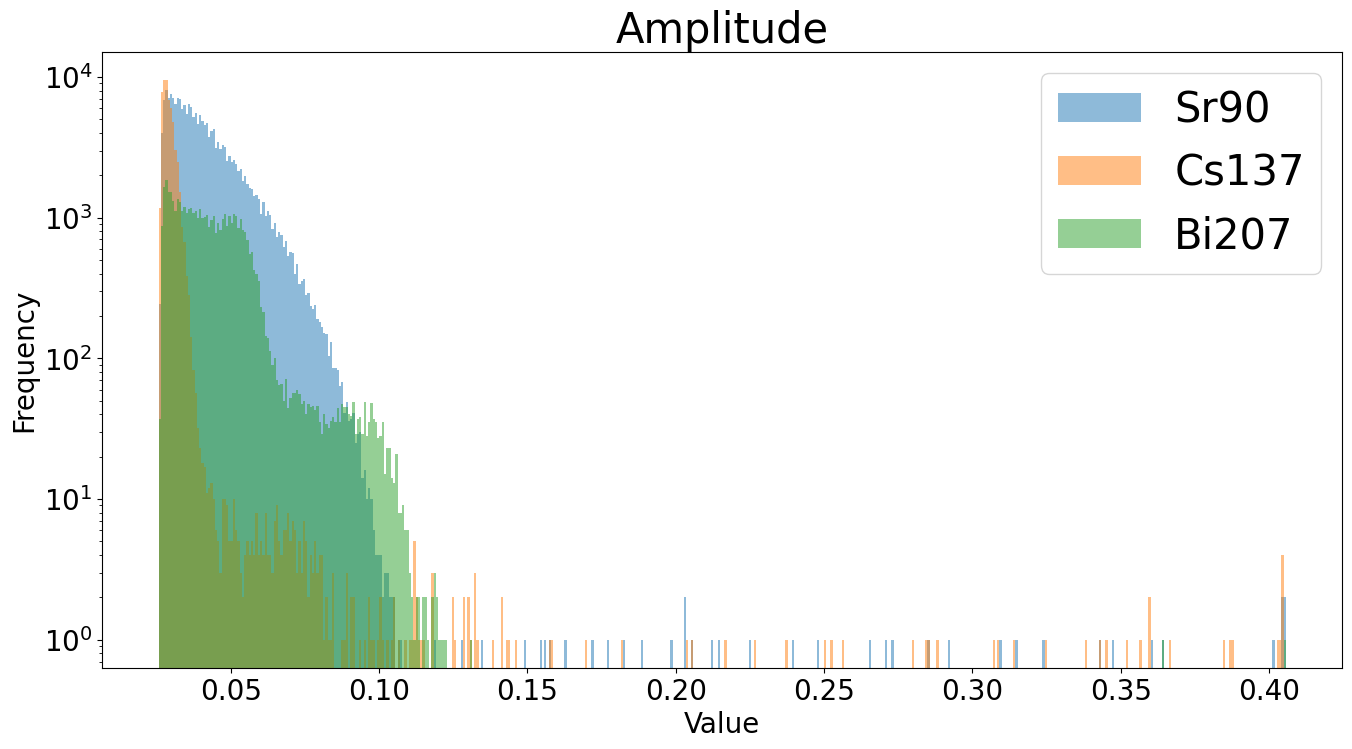

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90[:, 0])
max = np.amax(Sr90[:, 0])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 501)
ax.hist(Sr90[:, 0], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137[:, 0], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207[:, 0], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Amplitude', fontsize=30)
plt.show()

NameError: ignored

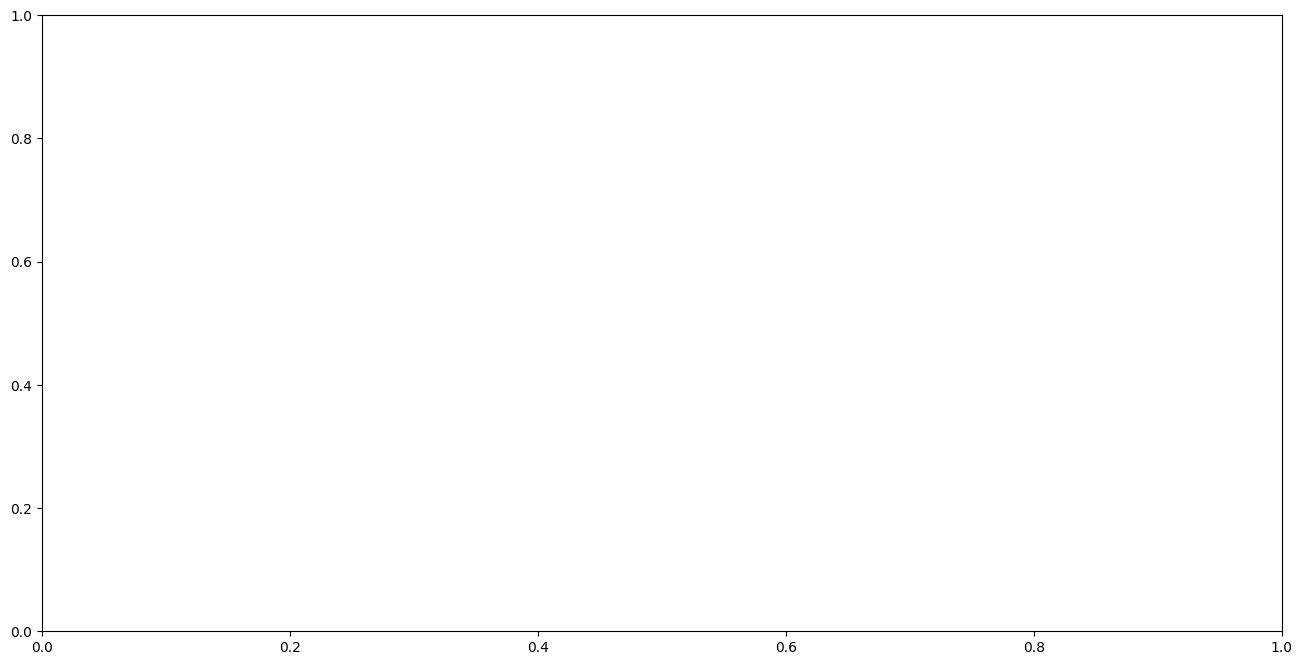

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90[:, 1])
max = np.amax(Sr90[:, 1])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 201)
ax.hist(Sr90[:, 1], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137[:, 1], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207[:, 1], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Area', fontsize=30)
plt.show()

Minimum value of the array: 8.92315
Maximum value of the array: 21.5748


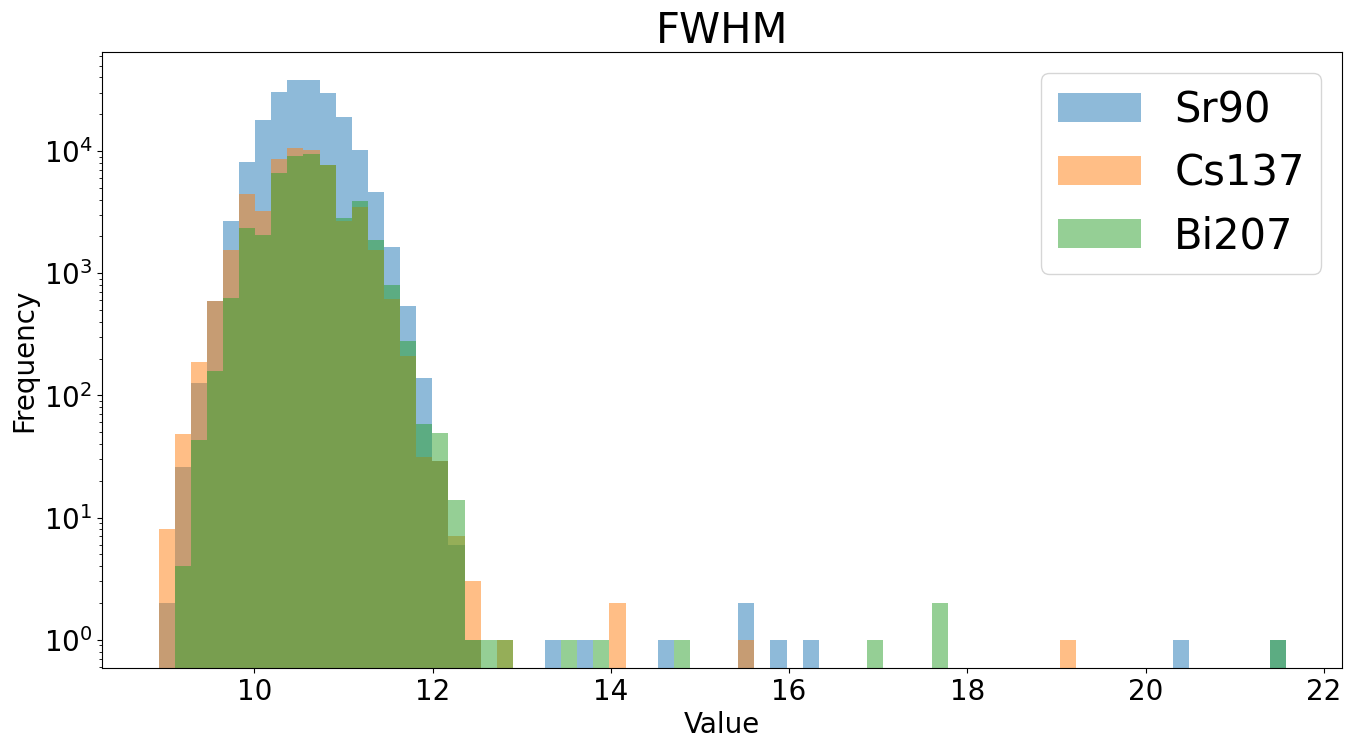

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90[:, 2])
max = np.amax(Sr90[:, 2])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 71)
ax.hist(Sr90[:, 2], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137[:, 2], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207[:, 2], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('FWHM', fontsize=30)
plt.show()

Minimum value of the array: 1.54176
Maximum value of the array: 95.15050000000001


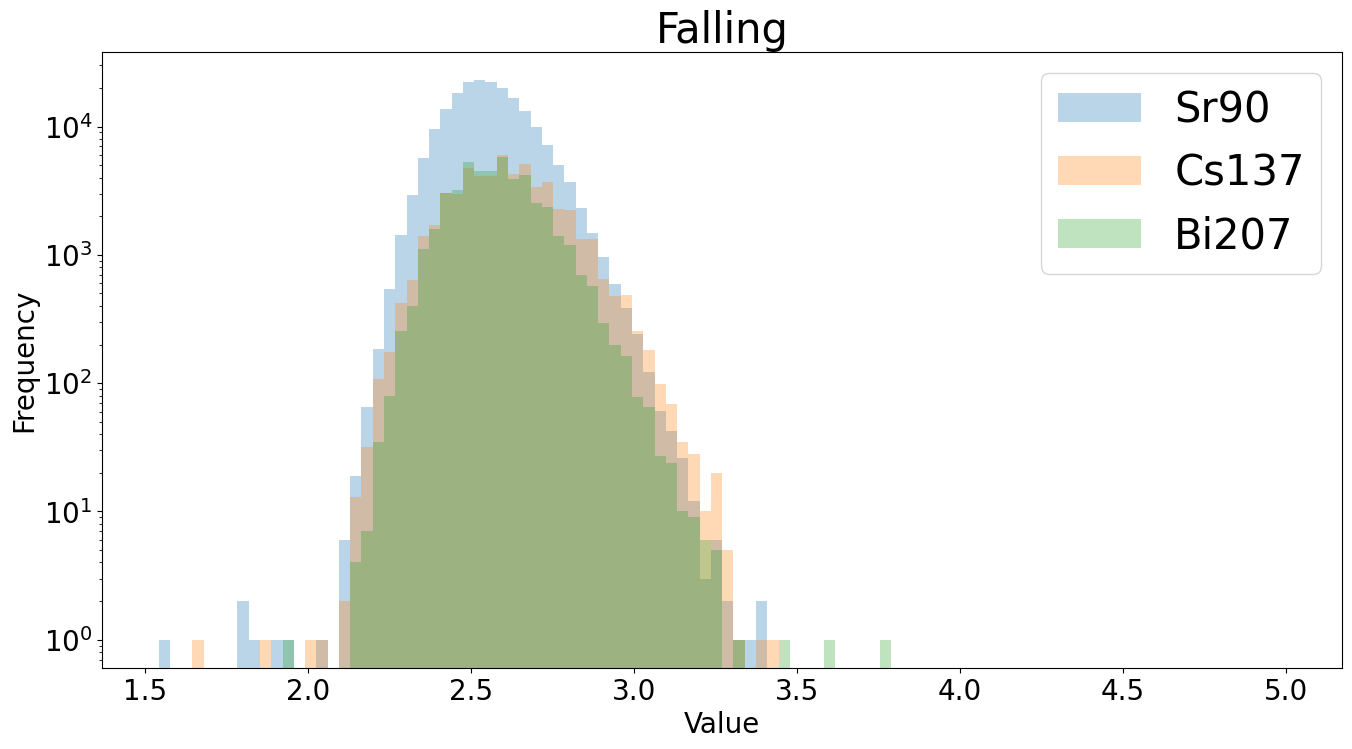

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90[:, 3])
max = np.amax(Sr90[:, 3])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, 5, 101)
ax.hist(Sr90[:, 3], bins, alpha=0.3, label='Sr90')
ax.hist(Cs137[:, 3], bins, alpha=0.3, label='Cs137')
ax.hist(Bi207[:, 3], bins, alpha=0.3, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Falling', fontsize=30)
plt.show()

Minimum value of the array: 8.8229
Maximum value of the array: 17.997799999999998


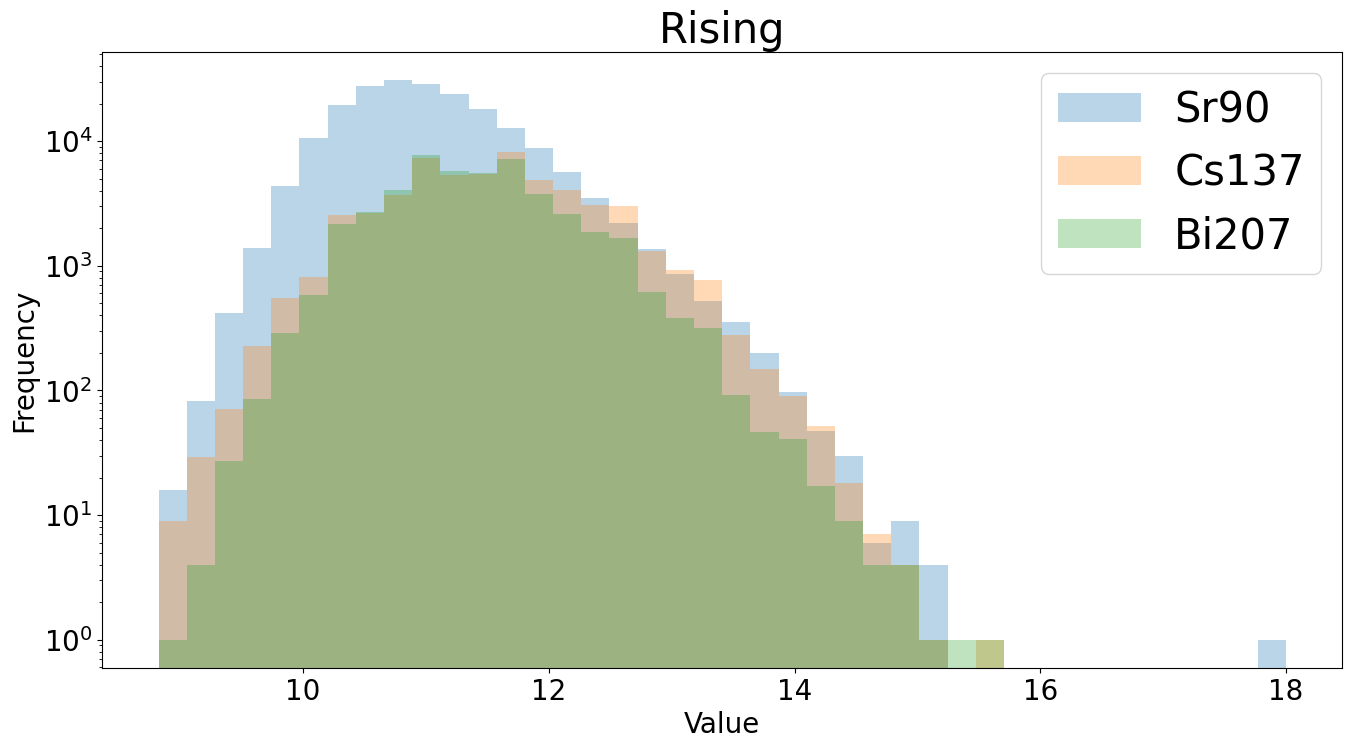

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90[:, 4])
max = np.amax(Sr90[:, 4])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 41)
ax.hist(Sr90[:, 4], bins, alpha=0.3, label='Sr90')
ax.hist(Cs137[:, 4], bins, alpha=0.3, label='Cs137')
ax.hist(Bi207[:, 4], bins, alpha=0.3, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Rising', fontsize=30)
plt.show()

###3. Removing Outlier Data (Background)

In [ ]:
Sr90_X = Sr90[:47000]
Cs137_X = Cs137[:47000]
Bi207_X = Bi207[:47000]

In [ ]:
Sr90_X_mask = Sr90_X[:, 0] > 0.13
Sr90_X = Sr90_X[~Sr90_X_mask]
print(Sr90_X.shape)

Cs137_X_mask = Cs137_X[:, 0] > 0.10
Cs137_X = Cs137_X[~Cs137_X_mask]
print(Cs137_X.shape)

Bi207_X_mask = Bi207_X[:, 0] > 0.13
Bi207_X = Bi207_X[~Bi207_X_mask]
print(Bi207_X.shape)

(46990, 5)
(46933, 29)
(46997, 29)


In [ ]:
Sr90_X_mask2 = Sr90_X[:, 1] < -2
Sr90_X = Sr90_X[~Sr90_X_mask2]
print(Sr90_X.shape)

Cs137_X_mask2 = Cs137_X[:, 1] < -3
Cs137_X = Cs137_X[~Cs137_X_mask2]
print(Cs137_X.shape)

Bi207_X_mask2 = Bi207_X[:, 1] < -2
Bi207_X = Bi207_X[~Bi207_X_mask2]
print(Bi207_X.shape)

(46990, 5)
(46933, 29)
(46997, 29)


In [ ]:
Sr90_X_mask = Sr90_X[:, 2] > 13
Sr90_X = Sr90_X[~Sr90_X_mask]
print(Sr90_X.shape)

Cs137_X_mask = Cs137_X[:, 2] > 13
Cs137_X = Cs137_X[~Cs137_X_mask]
print(Cs137_X.shape)

Bi207_X_mask = Bi207_X[:, 2] > 13
Bi207_X = Bi207_X[~Bi207_X_mask]
print(Bi207_X.shape)

(46989, 5)
(46933, 29)
(46989, 29)


In [ ]:
Sr90_X_mask = Sr90_X[:, 3] > 3.5
Sr90_X = Sr90_X[~Sr90_X_mask]
print(Sr90_X.shape)

Cs137_X_mask = Cs137_X[:, 3] > 3.5
Cs137_X = Cs137_X[~Cs137_X_mask]

# Bi207_X_mask = Bi207_X[:, 3] > 3.5
# Bi207_X = Bi207_X[~Bi207_X_mask]

print(Cs137_X.shape)
print(Bi207_X.shape)

(46987, 5)
(46930, 29)
(46989, 29)


In [ ]:
Sr90_X_mask = Sr90_X[:, 3] < 2.05
Sr90_X = Sr90_X[~Sr90_X_mask]
print(Sr90_X.shape)

Cs137_X_mask = Cs137_X[:, 3] < 2.05
Cs137_X = Cs137_X[~Cs137_X_mask]

# Bi207_X_mask = Bi207_X[:, 3] < 2.05
# Bi207_X = Bi207_X[~Bi207_X_mask]

print(Cs137_X.shape)
print(Bi207_X.shape)

(46987, 5)
(46930, 29)
(46989, 29)


In [ ]:
Sr90_X_mask = Sr90_X[:, 4] > 16
Sr90_X = Sr90_X[~Sr90_X_mask]
print(Sr90_X.shape)

Cs137_X_mask = Cs137_X[:, 4] > 16
Cs137_X = Cs137_X[~Cs137_X_mask]

# Bi207_X_mask = Bi207_X[:, 3] > 16
# Bi207_X = Bi207_X[~Bi207_X_mask]

print(Cs137_X.shape)
print(Bi207_X.shape)

(46987, 5)
(46930, 29)
(46989, 29)


###4. Plot Again

Minimum value of the array: 0.0256874
Maximum value of the array: 0.127945


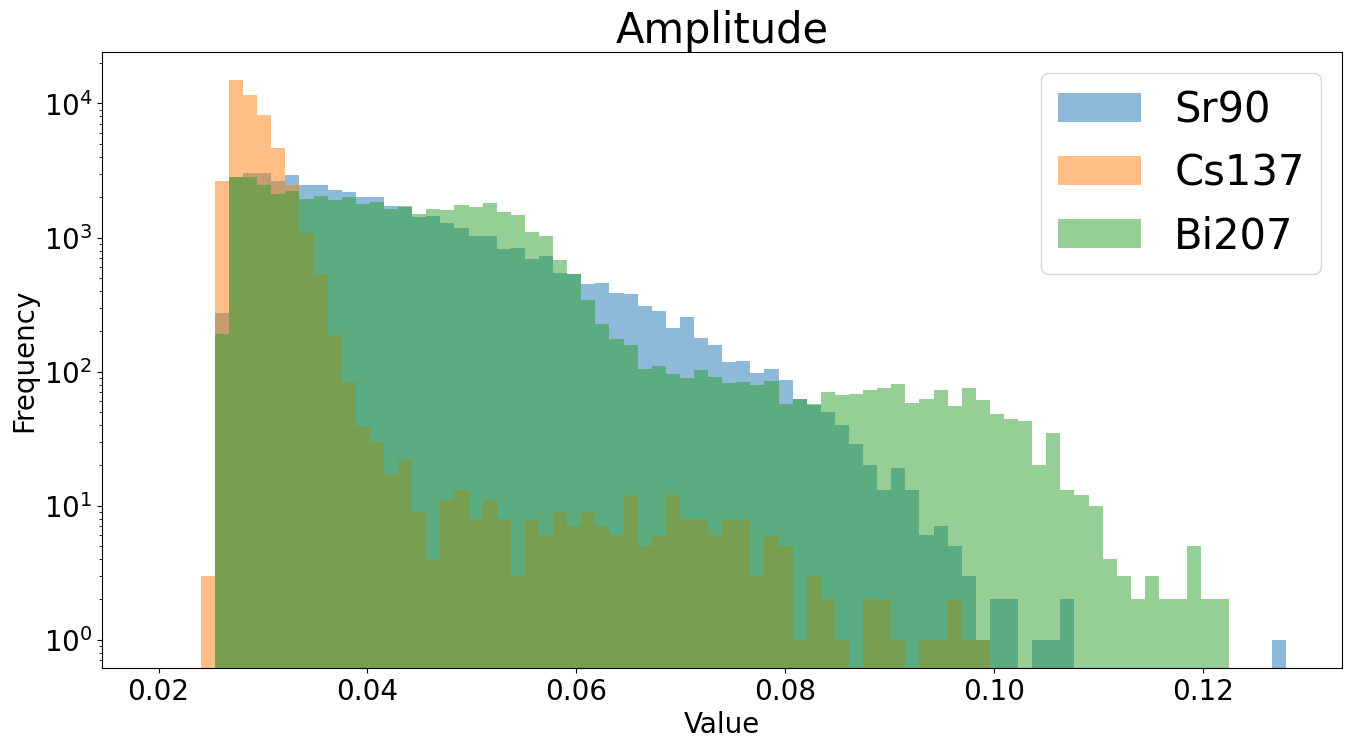

In [74]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 0])
max = np.amax(Sr90_X[:, 0])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(0.02, max, 81)
ax.hist(Sr90_X[:, 0], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 0], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 0], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Amplitude', fontsize=30)
plt.show()

Minimum value of the array: -1.7498799999999999
Maximum value of the array: -0.363603


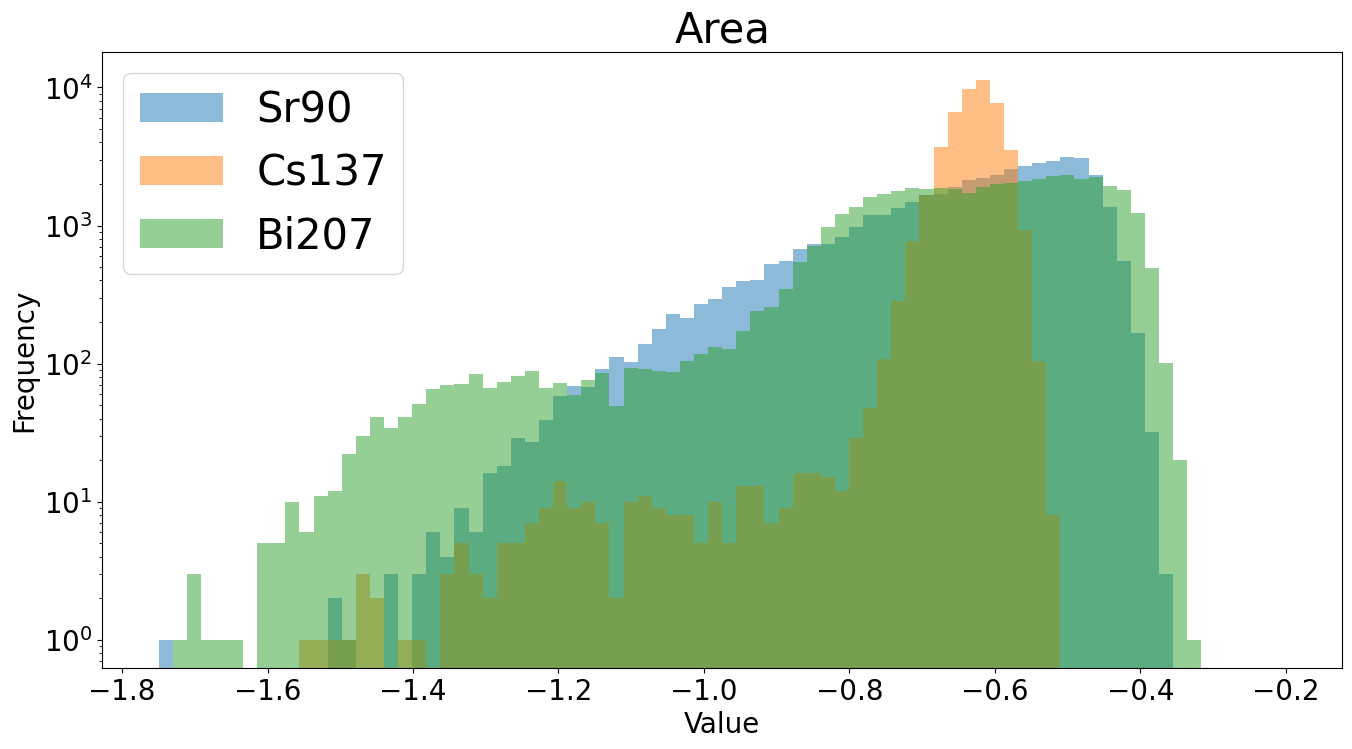

In [70]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 1])
max = np.amax(Sr90_X[:, 1])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, -0.2, 81)
ax.hist(Sr90_X[:, 1], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 1], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 1], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Area', fontsize=30)
plt.show()

Minimum value of the array: 9.16185
Maximum value of the array: 12.0875


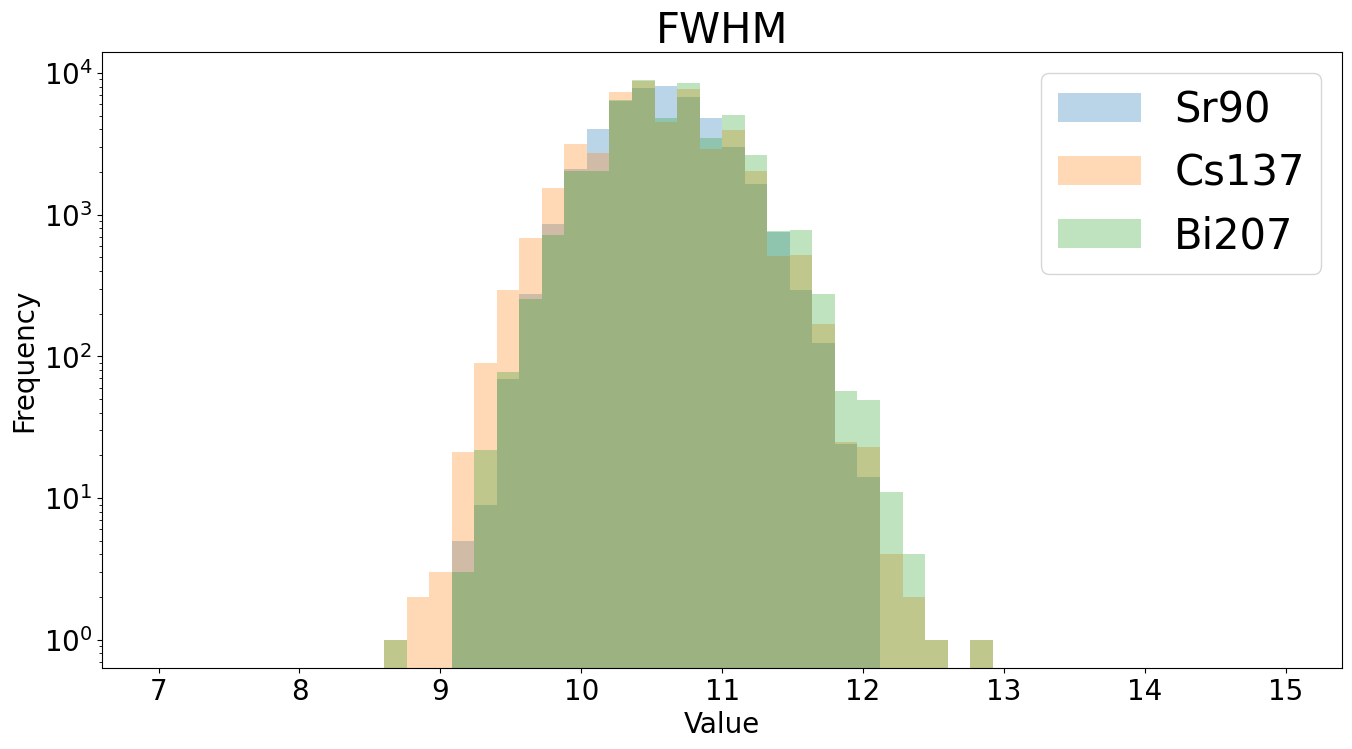

In [62]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 2])
max = np.amax(Sr90_X[:, 2])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(7, 15, 51)
ax.hist(Sr90_X[:, 2], bins, alpha=0.3, label='Sr90')
ax.hist(Cs137_X[:, 2], bins, alpha=0.3, label='Cs137')
ax.hist(Bi207_X[:, 2], bins, alpha=0.3, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('FWHM', fontsize=30)
plt.show()

Minimum value of the array: 2.1301699999999997
Maximum value of the array: 3.34253


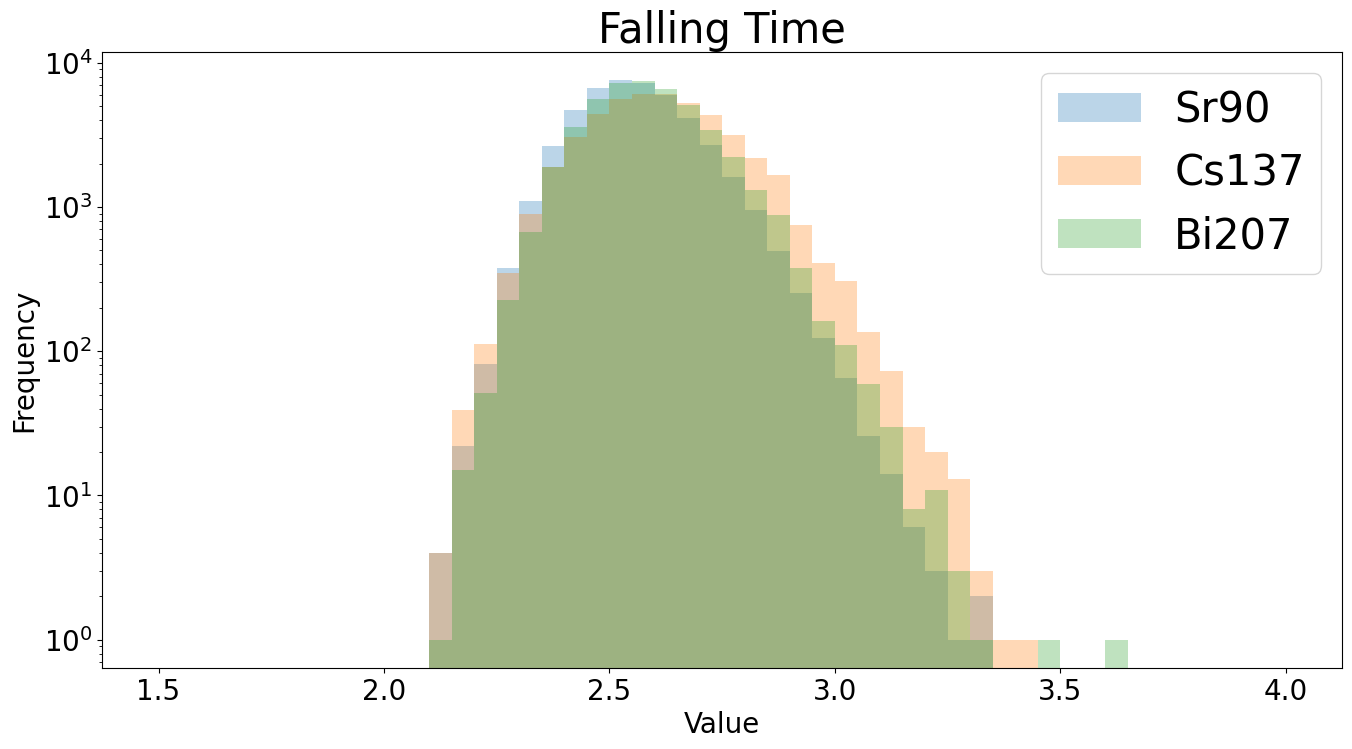

In [67]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 3])
max = np.amax(Sr90_X[:, 3])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(1.5, 4, 51)
ax.hist(Sr90_X[:, 3], bins, alpha=0.3, label='Sr90')
ax.hist(Cs137_X[:, 3], bins, alpha=0.3, label='Cs137')
ax.hist(Bi207_X[:, 3], bins, alpha=0.3, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Falling Time', fontsize=30)
plt.show()

Minimum value of the array: 8.8229
Maximum value of the array: 15.086


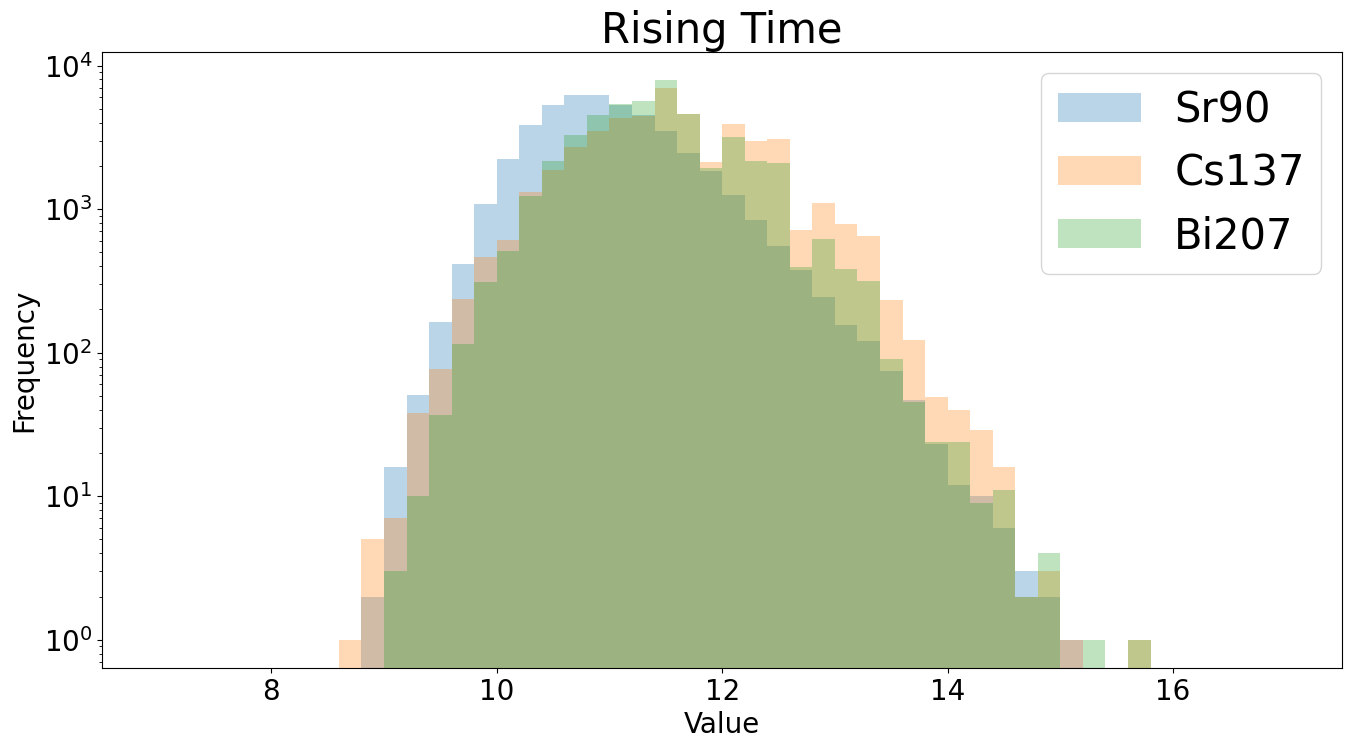

In [69]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 4])
max = np.amax(Sr90_X[:, 4])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(7, 17, 51)
ax.hist(Sr90_X[:, 4], bins, alpha=0.3, label='Sr90')
ax.hist(Cs137_X[:, 4], bins, alpha=0.3, label='Cs137')
ax.hist(Bi207_X[:, 4], bins, alpha=0.3, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Rising Time', fontsize=30)
plt.show()

###5. Collect a data to use

In [ ]:
# Sr90_X = Sr90_2[:, 2:10]
# Cs137_X = Cs137_2[:, 2:10 ]
# Bi207_X = Bi207_2[:, 2:10 ]

# Sr90_X = Sr90_2[:, 0:1 ]
# Cs137_X = Cs137_2[:, 0:1 ]
# Bi207_X = Bi207_2[:, 0:1 ]

# Sr90_X = Sr90_2
# Cs137_X = Cs137_2
# Bi207_X = Bi207_2

# Sr90_X = np.column_stack((Sr90_X[:, 0], Sr90_X[:, 5:10], Sr90_X[:, 12:]))
# Cs137_X = np.column_stack((Cs137_X[:, 0], Cs137_X[:, 5:10], Cs137_X[:, 12:]))
# Bi207_X = np.column_stack((Bi207_X[:, 0], Bi207_X[:, 5:10], Bi207_X[:, 12:]))

# # Sr90_X = np.column_stack((Sr90_2[:, 0],  Sr90_2[:, 12:14]))
# # Cs137_X = np.column_stack((Cs137_2[:, 0],  Cs137_2[:, 12:14]))
# # Bi207_X = np.column_stack((Bi207_2[:, 0],  Bi207_2[:, 12:14]))

# print(Sr90_X.shape)
# print(Cs137_X.shape)
# print(Bi207_X.shape)

In [ ]:
Sr90_X = Sr90_X[:,:5]
Cs137_X = Cs137_X[:,:5]
Bi207_X = Bi207_X[:,:5]

# Sr90_X = Sr90_2[:, 0:1 ]
# Cs137_X = Cs137_2[:, 0:1 ]
# Bi207_X = Bi207_2[:, 0:1 ]


In [ ]:
print(Sr90_X.shape)
print(Cs137_X.shape)
print(Bi207_X.shape)

(46987, 5)
(46930, 5)
(46989, 5)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:

# Save Sr90_X to a CSV file in /content/drive/MyDrive/
np.savetxt('/content/drive/MyDrive/PSD-Project/Sr90_X.csv', Sr90_X, delimiter=',')

# Save Cs137_X to a CSV file in /content/drive/MyDrive/
np.savetxt('/content/drive/MyDrive/PSD-Project/Cs137_X.csv', Cs137_X, delimiter=',')

# Save Bi207_X to a CSV file in /content/drive/MyDrive/
np.savetxt('/content/drive/MyDrive/PSD-Project/Bi207_X.csv', Bi207_X, delimiter=',')

In [ ]:
# Sr90_Y = np.full(51433, 90, dtype=np.int32)
# Cs137_Y = np.full(55469, 137, dtype=np.int32)
# Bi207_Y = np.full(47629, 207, dtype=np.int32)
# Am241_Y = np.full(21681, 241, dtype=np.int32)

# Sr90_Y = np.full(202277, 90, dtype=np.int32)
# Cs137_Y = np.full(55467, 137, dtype=np.int32)
# Bi207_Y = np.full(47629, 207, dtype=np.int32)

Sr90_Y = np.full(46987, 90, dtype=np.int32)
Cs137_Y = np.full(46930, 137, dtype=np.int32)
Bi207_Y = np.full(46989, 207, dtype=np.int32)

In [ ]:
print(Sr90_Y.shape)
print(Cs137_Y.shape)
print(Bi207_Y.shape)

(46987,)
(46930,)
(46989,)


In [ ]:
X = np.concatenate([Sr90_X, Cs137_X, Bi207_X], axis=0)
X.shape

(140906, 5)

In [ ]:
y = np.concatenate([Sr90_Y, Cs137_Y, Bi207_Y], axis=0)
y.shape

(140906,)

###6. Decision Tree (Not use anymore)

Decision trees require very little data preparation. They don't require feature scaling or centering at all.

###7. Random Forest

# Ensemble Learning | Random Forests

* ask many people a complex question and aggregate their answers - the **wisdom of the crowds**
* aggregate the predictions of a group of predictors (classifiers or regressors) --> better predictions than the best individual predictor
* a group of predictors is called an **ensemble**; the technique is called **ensemble learning**
* e.g., you can train a group of Decision Tree classifiers, each on a different random subset of the training set. To make predictions, you obtain the predictions of all the indivisual trees, then predict the class that gets the most votes --> **Random Forest**
* the winning solutions in ML competitions often involve ensemble methods

## Voting classifiers

* we have trained a few classifiers, each one achieving about 80% accuracy
* we can create an even better classifier is to aggreagte the predictions of each classifier and predict the class that gets the most votes
* this is called a **hard voting classifier**

In [ ]:
from sklearn.model_selection import train_test_split
#from sklearn.datasets import make_moons

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Random Forests

A Random Forest is an ensemble of Decision Trees, generally trained via the bagging method, typically with `max_samples` set to the size of the training set. Instead of building a BaggingClassifier and passing it a DecisionTreeClassifier, you can instead use the **RandomForestClassifier** class.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8016294319697959


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=32, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred2 = rnd_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred2))

0.8515627217759105


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=64, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred3 = rnd_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred3))

0.8960740341215545


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=5000, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred9 = rnd_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred9))

0.9781701535753825


In [38]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=10000, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred10 = rnd_clf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred10))

0.9786811252732279


In [40]:
rnd_clf = RandomForestClassifier(n_estimators=5000, max_leaf_nodes=5000, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred11 = rnd_clf.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred11))

0.9784824140573991


###8. Result

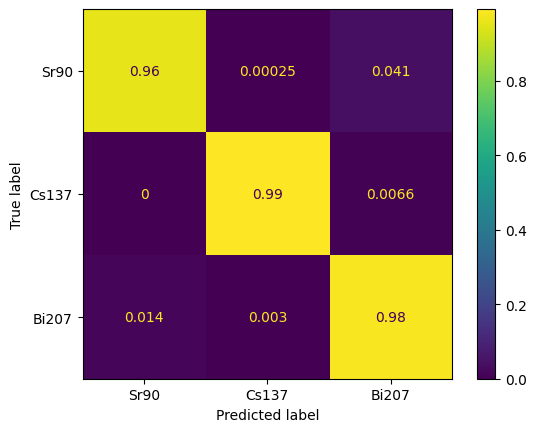

In [29]:
#Confusion Matrix with percetage

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred9)

# Normalize the confusion matrix to show the probability values
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a ConfusionMatrixDisplay object with probability values
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sr90', 'Cs137', 'Bi207'])

# Display the confusion matrix with probability values
disp.plot()

In [30]:
rnd_clf.feature_importances_

array([0.33219896, 0.29279133, 0.13234324, 0.04113008, 0.20153639])

In [31]:
n_features = rnd_clf.n_features_in_

In [32]:
feature_list = ['Amp', 'Area', 'FWHM', 'Falling Time', 'Rising Time']

<Figure size 8000x6000 with 0 Axes>

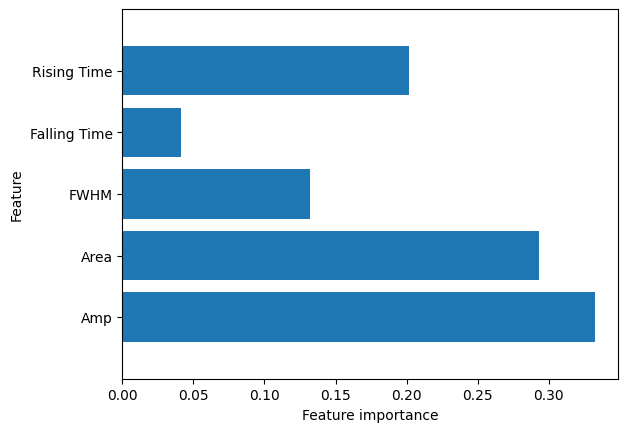

<Figure size 8000x6000 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt

plt.barh(np.arange(n_features), rnd_clf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), feature_list)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features);
plt.figure(figsize=(80, 60))